In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import torch.nn.functional as F

from torch.autograd import Variable
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from tkmodel.TwoCUM_copy import TwoCUMfittingConc
from tkmodel.TwoCUM_copy import TwoCUM

In [2]:
AIF = np.load("data/AIF.npy")
series = np.load("data/Example_Conc.npy")

In [3]:
#For the uterus?

t = np.arange(0,366,2.45)

no_list1 = []

E_list1 = []
Fp_list1 = []
vp_list1 = []

ilist = np.arange(112, 120)
jlist = np.arange(80, 95)
klist = np.arange(10, 20)
range_dict1 = {}
index_list = []
for i in ilist:
    for j in jlist:
        for k in klist:
            if np.isnan(series[i,j,k,:]).all() == True:
                print('OUT: ', i,j,k)
                print('min : max', series[i,j,k,:].min(), series[i,j,k,:].max())
                continue
            
                
            else:
                print('IN: ', i,j,k)
                print('min : max', series[i,j,k,:].min(), series[i,j,k,:].max())
                range_dict1[(i,j,k)] = [series[i,j,k,:].min(), series[i,j,k,:].max()]
                try:
                    fitted_param = TwoCUMfittingConc(t, AIF, series[i,j,k,:] , 0)
                except ValueError as e:
                    print('Caught Value Error')
                    no_list1.append((i,j,k))
                    continue

                E_list1.append(fitted_param[0])
                Fp_list1.append(fitted_param[1])
                vp_list1.append(fitted_param[2])
                index_list.append((i,j,k))

IN:  112 80 10
min : max -0.0044261211209823716 0.08914706175159752
IN:  112 80 11
min : max -0.008705246342860993 0.14591365159566055
IN:  112 80 12
min : max -0.13298019101272218 2.7836345649253804
IN:  112 80 13
min : max -0.10929572661778594 1.0057279243969146
IN:  112 80 14
min : max -0.13992706517496073 1.9777000718206303
IN:  112 80 15
min : max -0.11051920471838172 1.2706516558443277
IN:  112 80 16
min : max -0.051811090559998774 1.4220252231096921
IN:  112 80 17
min : max -0.20978236829755936 3.633311663513185


/afs/inf.ed.ac.uk/user/s17/s1740929/MRI_ML/tkmodel/TwoCUM_copy.py:34: RuntimeWarning: overflow encountered in exp
  exptTp=np.exp(-1*t/Tp)
/afs/inf.ed.ac.uk/user/s17/s1740929/MRI_ML/tkmodel/TwoCUM_copy.py:136: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(temp**2))


IN:  112 80 18
min : max -0.07966560818118326 1.1292176083569774
IN:  112 80 19
min : max -0.026539169084269537 0.16530391530333505
IN:  112 81 10
min : max -0.004899749944697891 0.10615168969789535
IN:  112 81 11
min : max -0.007108569998782906 0.17313816382773545
IN:  112 81 12
min : max -0.06919857217033659 1.4594794150880905
IN:  112 81 13
min : max -0.057904622006921425 0.9993806523091462
IN:  112 81 14
min : max -0.08596472631248453 1.5567880082923762
IN:  112 81 15
min : max -0.047428060271949235 1.1131780578172914
IN:  112 81 16
min : max -0.031501802273179225 0.42348026752641793
IN:  112 81 17
min : max -0.025082566548599555 0.442725686354941
IN:  112 81 18
min : max -0.15752262709706566 2.4411715725440932
IN:  112 81 19
min : max -0.02731146706874852 0.24858743534134226
IN:  112 82 10
min : max -0.006340461810371716 0.15894613730811122
IN:  112 82 11
min : max -0.00484027333621264 0.1561269563755576
IN:  112 82 12
min : max -0.02569858570499442 0.6918220053815616
IN:  112 82 

/usr/lib/python3/dist-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


IN:  112 92 17
min : max -0.17344509269844954 3.379531886626721
IN:  112 92 18
min : max -0.4984626341083713 20.84546292886159
Caught Value Error
IN:  112 92 19
min : max -0.2800285247221169 3.7559507046372667
IN:  112 93 10
min : max -0.025165497017740415 0.031512254835290715
IN:  112 93 11
min : max -0.002123183820411864 0.01062612434777653
IN:  112 93 12
min : max -0.0026505799928168775 0.01984321227600056
IN:  112 93 13
min : max -0.06951143844472973 3.6183357536695997
IN:  112 93 14
min : max -0.007220515601073674 0.18377162250358078
IN:  112 93 15
min : max -0.010336644840422848 0.3231514536893017
IN:  112 93 16
min : max -0.093839360656915 3.3635187572555414
IN:  112 93 17
min : max -0.4596069636494303 7.341114704326203
Caught Value Error
IN:  112 93 18
min : max -0.0895411993725169 1.205515102885629
IN:  112 93 19
min : max -0.0829611984340754 1.17998102257202
IN:  112 94 10
min : max -0.01236357208676106 0.06120022134904418
IN:  112 94 11
min : max -0.0010337348937221533 0.007

IN:  113 89 19
min : max -0.9474184751281801 17.15421879394325
Caught Value Error
IN:  113 90 10
min : max -0.002377109868618058 0.027940682395623053
IN:  113 90 11
min : max -0.002704132106218983 0.03788025133768878
IN:  113 90 12
min : max -0.037588900122434765 1.1338597109117252
IN:  113 90 13
min : max -0.08373550686221498 3.999887077958803
IN:  113 90 14
min : max -0.29521590189686886 2.5891978833144558
IN:  113 90 15
min : max -0.021806394185782133 0.3192106147548518
IN:  113 90 16
min : max -0.04310206743431237 0.6061485852605656
IN:  113 90 17
min : max -0.15850037279555723 2.214702401275268
IN:  113 90 18
min : max -0.06221242256020626 1.53783425355756
IN:  113 90 19
min : max -0.2169086104491621 1.4008655998109398
IN:  113 91 10
min : max -0.008310269899351692 0.023647196914580754
IN:  113 91 11
min : max -0.002797801845909949 0.04161942053406521
IN:  113 91 12
min : max -0.019501235322170643 0.8260494611445689
IN:  113 91 13
min : max -0.012866044572857893 0.3053892426528333

IN:  114 87 13
min : max -0.029973134254085203 0.39240234924627837
IN:  114 87 14
min : max -0.05897281014008428 0.7345034205062384
IN:  114 87 15
min : max -0.3036323562526705 4.905900394859325
IN:  114 87 16
min : max -0.17485631325986062 4.400510817705628
IN:  114 87 17
min : max -0.05874298005695483 1.6477711613168995
IN:  114 87 18
min : max -0.10590292814350485 1.2977965682835435
IN:  114 87 19
min : max -0.6017416664864728 20.193745395893867
Caught Value Error
IN:  114 88 10
min : max -0.0022648652034767593 0.024486013256659223
IN:  114 88 11
min : max -0.03375059934416494 0.5296847942901878
IN:  114 88 12
min : max -0.013600071174631613 0.20587355206496677
IN:  114 88 13
min : max -0.01464093375455023 0.24470446030429108
IN:  114 88 14
min : max -0.1601117176110075 1.2165498078360484
IN:  114 88 15
min : max -0.21744532245127546 5.163909180888954
Caught Value Error
IN:  114 88 16
min : max -0.14141681197595302 4.5765654493666785
Caught Value Error
IN:  114 88 17
min : max -0.22

IN:  115 84 12
min : max -0.1277075289057652 2.6713902712241273
IN:  115 84 13
min : max -0.643927033789409 36.67580612333124
Caught Value Error
IN:  115 84 14
min : max -0.04222256747659969 2.2503515000287257
IN:  115 84 15
min : max -0.06024190588175524 1.1273566507839612
IN:  115 84 16
min : max -0.1486256230183114 1.631943803067636
IN:  115 84 17
min : max -0.027125778400164474 0.5077836899340157
IN:  115 84 18
min : max -0.07108941002813982 1.02586667810766
IN:  115 84 19
min : max -0.07835694127749782 1.2761207846550877
IN:  115 85 10
min : max -0.23308794313810544 8.75892151743733
Caught Value Error
IN:  115 85 11
min : max -0.040770742343982924 1.3825312793286475
IN:  115 85 12
min : max -0.530372243763978 30.075875634605122
Caught Value Error
IN:  115 85 13
min : max -0.060986574736016985 1.4092449887744856
IN:  115 85 14
min : max -0.2671216251166003 5.771109006640575
Caught Value Error
IN:  115 85 15
min : max -0.044136694823566414 1.3110361929078622
IN:  115 85 16
min : max

IN:  116 81 12
min : max -0.07520310519527229 1.390500396044682
IN:  116 81 13
min : max -0.06541288281981184 2.388728223452011
IN:  116 81 14
min : max -0.12661299303343881 1.686269185839192
IN:  116 81 15
min : max -0.028678523707217712 0.787273935940257
IN:  116 81 16
min : max -0.07538894108401484 1.4286265714457067
IN:  116 81 17
min : max -0.610394465612512 57.95595479907553
Caught Value Error
IN:  116 81 18
min : max -0.05895037722549373 0.8164359882585065
IN:  116 81 19
min : max -0.06652735963996104 0.6610092951009872
IN:  116 82 10
min : max -0.12097713335746241 3.7294844656968493
IN:  116 82 11
min : max -0.23796412843762327 8.4354532676739
Caught Value Error
IN:  116 82 12
min : max -0.07754404537597948 2.3528360075701205
IN:  116 82 13
min : max -0.09912380811539034 3.246860241332555
IN:  116 82 14
min : max -0.10307320576677903 1.9957867534030518
IN:  116 82 15
min : max -0.03977387468607954 0.9538123335946741
IN:  116 82 16
min : max -0.04599135833652335 1.45028715116721

IN:  116 93 14
min : max -0.049845659886276816 0.463880201881094
IN:  116 93 15
min : max -0.4347097345542331 7.724857397210442
Caught Value Error
IN:  116 93 16
min : max -0.37063709942476697 4.033450565056815
IN:  116 93 17
min : max -0.1573290540774332 1.9353283561200356
IN:  116 93 18
min : max -0.13487156269364564 4.393564999012135
Caught Value Error
IN:  116 93 19
min : max -0.6366561766687537 22.166440207684488
Caught Value Error
IN:  116 94 10
min : max -0.028026537536428586 0.19151655210920865
IN:  116 94 11
min : max -0.0011047287635980833 0.008880150466364619
IN:  116 94 12
min : max -0.0011441472418417305 0.014891908497270687
IN:  116 94 13
min : max -0.03666838986499829 0.830219084432096
IN:  116 94 14
min : max -0.599336580045366 50.14469244562199
Caught Value Error
IN:  116 94 15
min : max -0.07016091474703773 1.7799567757013273
IN:  116 94 16
min : max -0.04128332625394482 1.1781815089079972
IN:  116 94 17
min : max -0.14059819615802427 2.617477692054272
IN:  116 94 18


IN:  117 90 10
min : max -0.003427752789714333 0.04602882251764537
IN:  117 90 11
min : max -0.05188863056753262 0.8010170916609767
IN:  117 90 12
min : max -0.083492285764797 1.2271026025866882
IN:  117 90 13
min : max -0.10376509429660624 1.0991352874582845
IN:  117 90 14
min : max -0.186970794724785 1.9868738294086519
IN:  117 90 15
min : max -0.10452273378828036 2.934239753668505
IN:  117 90 16
min : max -0.5765977093487933 9.542090722146906
Caught Value Error
IN:  117 90 17
min : max -0.7186152230057913 10.578712541189843
Caught Value Error
IN:  117 90 18
min : max -0.4115660278556367 5.6755070719753995
Caught Value Error
IN:  117 90 19
min : max -0.9322622112948236 24.396729193890195
Caught Value Error
IN:  117 91 10
min : max -0.003054548985931216 0.04280583278323745
IN:  117 91 11
min : max -0.10508668693487438 1.3983702963955094
IN:  117 91 12
min : max -0.17970424255068318 1.7053167561274307
IN:  117 91 13
min : max -0.07727673423968132 1.0269622487860144
IN:  117 91 14
min :

Caught Value Error
IN:  118 86 19
min : max -0.03077852536303341 0.6468075317225381
IN:  118 87 10
min : max -0.07995916846174866 4.081797975100699
IN:  118 87 11
min : max -0.1683726228469139 5.6701364723734144
Caught Value Error
IN:  118 87 12
min : max -0.2032969627055956 9.375584749927018
Caught Value Error
IN:  118 87 13
min : max nan nan
Caught Value Error
IN:  118 87 14
min : max -0.5538682710168796 12.471256440297482
Caught Value Error
IN:  118 87 15
min : max -0.1632520837075116 2.0854800734185526
IN:  118 87 16
min : max -0.1910590951114317 3.8560187368697325
IN:  118 87 17
min : max -0.37928881582775986 11.245298998088495
Caught Value Error
IN:  118 87 18
min : max -0.19920092154089053 3.663120188944257
IN:  118 87 19
min : max -0.16082497178314825 2.4938865656875544
IN:  118 88 10
min : max -0.113408222018064 4.220932079915813
IN:  118 88 11
min : max -0.09258785178558537 4.717892460877136
Caught Value Error
IN:  118 88 12
min : max -0.5244721359414641 36.68174406613282
Cau

IN:  119 83 17
min : max -0.24229524994627794 5.455425862900136
Caught Value Error
IN:  119 83 18
min : max -0.015133832965854202 0.2731577192612874
IN:  119 83 19
min : max -0.000819640059699648 0.012727929545291576
IN:  119 84 10
min : max -0.604438065524386 120.11665355397821
Caught Value Error
IN:  119 84 11
min : max -0.44515214374865253 10.529336064280056
Caught Value Error
IN:  119 84 12
min : max -0.22279048242717892 11.35883570881999
Caught Value Error
IN:  119 84 13
min : max -0.6478460423041679 424.6196494865591
Caught Value Error
IN:  119 84 14
min : max -0.19374054455089174 4.0952211474669005
IN:  119 84 15
min : max -0.1537056741467676 1.9062200417779926
IN:  119 84 16
min : max -0.20875323767946807 3.417577980935172
IN:  119 84 17
min : max -0.14197796335079427 3.1294670811190657
IN:  119 84 18
min : max -0.06757215885845852 1.635509362378856
IN:  119 84 19
min : max -0.0032599257772751803 0.07212607431428636
IN:  119 85 10
min : max -0.21471203929565186 7.04912782253887

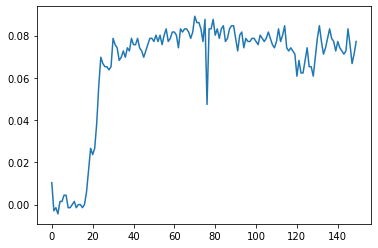

In [34]:
E_list = np.array(E_list1)
Fp_list = np.array(Fp_list1)
vp_list = np.array(vp_list1)

E_list = E_list[None,:]
Fp_list = Fp_list[None, :]
vp_list = vp_list[None, :]

E_Fp = np.concatenate((E_list, Fp_list), axis =0)
y = np.concatenate((E_Fp, vp_list), axis =0)
y = y.T

x = np.zeros( (len(E_list1), 150) )

for i, index in enumerate(index_list):
    x[i] = series[index[0], index[1], index[2],:]
    

plt.plot(x[0])

In [35]:
np.save('trained_models/data/test_x.npy', x)
np.save('trained_models/data/test_y.npy', y)